# Table of Content - Customer Service Study

### [Lab case Study](#00)

### [Pipeline df2](#0):
1.  [Aggregate data into one Data Frame using Pandas.](#1)
2. [Standardizing header names](#2)
3. [Deleting and rearranging columns](#3)
4. [Working with data types – Check the data types of all the columns](#4)
5. [Filtering data and Correcting typos](#5)
6. [Removing duplicates](#6)
7. [Optional:Replacing null values](#7)
8. [Bucketing the data](#8)
9. [Standardizing the data](#9)
10. [Which columns are numerical?](#10)
11. [Which columns are categorical?](#11)
12. [Check and deal with NaN values](#12)


### [Pipeline df3](#15)
1. [Datetime format ](#13)
2. [BONUS: Put all the previously mentioned data transformations into a function/functions.](#14)
3. [Show a plot of the total number of responses.](#16)
4. [Show a plot of the response rate by the sales channel.](#17)
5. [Show a plot of the response rate by the total claim amount.](#18)
6. [Show a plot of the response rate by income.](#19)
7. [Don't Limit your creativity!](#20)
8. [Plot the Correlation Heatmap.](#21)
9. [Clean your notebook ](#22)


### Statistic tasks

1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
3. Normalize (numericals)
4. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
5. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

6. Bonus: split Data set into train and test sets

# Lab Case Study <a class="anchor" id="00"></a>

### Scenario

You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Business Objectives

- Retain customers,
- analyze relevant customer data,
- develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Activities

Refer to the `Activities.md` file where you will find guidelines for some of the activities that you want to do.

### Data

The csv files is provided in the folder. The columns in the file are self-explanatory.

----

# Pipeline  df 2 <a class="anchor" id="0"></a>
cleaning and analysing file1.csv and file2.csv

In [87]:
# import libraries to use (pandas, numpy, matplotlib.pyplot and seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

def load_data(path):
    return pd.read_csv(path)

def concat(df2):
    df2=pd.concat([df,df1], ignore_index='TRUE')
        
df = load_data(path ='files/file1.csv')
df1 = load_data(path ='files/file2.csv')

def lower_case_column(df2):
    df2.columns = [i.lower() for i in df2]
    return df2

df2 = pd.concat([df,df1], ignore_index='TRUE')\
.pipe(lower_case_column)
#.pipe(rename_columns)

df2.head(3)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247


## 1. Aggregate data into one Data Frame using Pandas. <a class="anchor" id="1"></a>

In [82]:


df= pd.read_csv('files/file1.csv')
df1=pd.read_csv('files/file2.csv')



In [263]:
#df

In [264]:
set(df.columns) == set(df1.columns)

True

In [265]:
#concat or append can be used to combine both files
#ignore_index='TRUE' is important, otherwhise the previous index will be used

df2=pd.concat([df,df1], ignore_index='TRUE')

In [266]:
#df2

## 2. Standardizing header names <a class="anchor" id="2"></a>



In [267]:
df2.columns = [i.lower() for i in df2.columns]
df2.columns

Index(['customer', 'st', 'gender', 'education', 'customer lifetime value',
       'income', 'monthly premium auto', 'number of open complaints',
       'policy type', 'vehicle class', 'total claim amount'],
      dtype='object')

## 3. Deleting and rearranging columns 
delete the column customer as it is only a unique identifier for each row of data <a class="anchor" id="3"></a>

In [268]:
#delete column 'customer'
#df2 = df2.drop(columns = 'customer')

In [269]:
#df2

## 4. Working with data types
Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints ) <a class="anchor" id="4"></a>


In [270]:
#Checking the data types of every column
df2.dtypes

customer                      object
st                            object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [271]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   2067 non-null   object 
 1   st                         2067 non-null   object 
 2   gender                     1945 non-null   object 
 3   education                  2067 non-null   object 
 4   customer lifetime value    2060 non-null   object 
 5   income                     2067 non-null   float64
 6   monthly premium auto       2067 non-null   float64
 7   number of open complaints  2067 non-null   object 
 8   policy type                2067 non-null   object 
 9   vehicle class              2067 non-null   object 
 10  total claim amount         2067 non-null   float64
dtypes: float64(3), object(8)
memory usage: 430.2+ KB


In [272]:
#customer lifetime value should be a float and not a %

def function(x):
    x= str(x)

    if x != "nan":
        #all vales besides of the last % shall be a float number
        y = x [:-1]
        return float (y)
    else:
        return 0

df2["customer lifetime value"] = df2["customer lifetime value"].apply(function)




In [273]:
# values of 'number of complaints'
df2["number of open complaints"].value_counts()



1/0/00    1626
1/1/00     247
1/2/00      93
1/3/00      60
1/4/00      29
1/5/00      12
Name: number of open complaints, dtype: int64

In [274]:
#number of complaints should only disply the 3rd character
def function2(x):
    x= str(x)

    if x != "nan":
        #all vales besides of the last % shall be a float number
        y = x[2]
        return int(y)
    else:
        return 0

df2["number of open complaints"] = df2["number of open complaints"].apply(function2)




In [275]:
#check of the function
df2["number of open complaints"].unique()



array([0, 2, 1, 3, 5, 4])

## 5. Filtering data and Correcting typos 
Filter the data in state and gender column to standardize the texts in those columns <a class="anchor" id="5"></a>


In [276]:
#analyse the uniques in st
df2.st.unique()


array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [277]:
#cleaning the state names
def st_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        states= {'Arizona' : 'AZ', 
                 'California': 'CA',
                 'Nevada' : 'NV', 
                 'Cali' :'CA,', 
                 'Oregon':'OR', 
                 'AZ' :'AZ', 
                 'WA':'WA',
                 'Washington':'WA',
                 'Cali':'CA'}
        
        return states[x]

In [278]:
#apply the function to the main df2
df2["st"] = df2["st"].apply(st_clean)

In [279]:
#analyse the uniques in gender
df2.gender.unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [280]:
#cleaning the gender names
def gender1_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        g = {'F': 'F', 
                 'M' : 'M', 
                 'Femal': 'F',
                 'Male' : 'M', 
                 'female' :'F'}
        
        return g[x]
        





In [281]:
df2["gender"] = df2["gender"].apply(gender1_clean)

In [282]:
df2.gender.unique()

array([nan, 'F', 'M'], dtype=object)

## 6. Removing duplicates <a class="anchor" id="6"></a>


In [283]:
df2.drop_duplicates()

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,WA,NaN,Master,0.00,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,AZ,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,NV,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,CA,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,WA,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4999,HV85198,AZ,M,Master,847141.75,63513.0,70.0,0,Personal Auto,Four-Door Car,185.667213
5000,BS91566,AZ,F,College,543121.91,58161.0,68.0,0,Corporate Auto,Four-Door Car,140.747286
5001,IL40123,NV,F,College,568964.41,83640.0,70.0,0,Corporate Auto,Two-Door Car,471.050488
5002,MY32149,CA,F,Master,368672.38,0.0,96.0,0,Personal Auto,Two-Door Car,28.460568


In [284]:
#index should be from 0 to 2055
import numpy as np
df2.index = np.arange(0,5004)

In [285]:
#df2

## 7. Optional:Replacing null values 
Replace missing values with means of the column (for numerical columns) <a class="anchor" id="7"></a>

In [286]:
df2.columns

Index(['customer', 'st', 'gender', 'education', 'customer lifetime value',
       'income', 'monthly premium auto', 'number of open complaints',
       'policy type', 'vehicle class', 'total claim amount'],
      dtype='object')

In [287]:
df2["customer lifetime value"].mean()

321081.0141846531

In [288]:
#replace empty fields with mean
df2['customer lifetime value'].fillna(df2["customer lifetime value"].mean(),inplace=True )

In [289]:
df2['income'].fillna(df2["income"].mean(),inplace=True)

In [290]:
df2['monthly premium auto'].fillna(df2["monthly premium auto"].mean(),inplace=True)

In [291]:
df2['total claim amount'].fillna(df2["total claim amount"].mean(),inplace=True)

In [292]:
df2['number of open complaints'].fillna(df2["number of open complaints"].mean(),inplace=True)

In [293]:
# isn't working:
#df2 = df2.applymap(lambda i: i.mean() if type(df2.columns) == float or  type(df2.columns)== int else i)

In [294]:
df2.isnull().sum().sum()

17744

## 8. Bucketing the data 
Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central <a class="anchor" id="8"></a>


In [295]:
df2.st.unique()
def st_region(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        region= {'AZ': 'Central', 
                  'CA': 'West',
                 'NV': 'Central', 
                 'OR':'North West', 
                  'AZ':'Central', 
                 'WA':'East'}
        
        return region[x]
    
df2["st"] = df2["st"].apply(st_region)

In [296]:
df2 = df2.rename(columns={'st': 'region'})

## 9. Standardizing the data 
Use string functions to standardize the text data (lower case) <a class="anchor" id="9"></a>

In [297]:
df2 = df2.applymap(lambda i: i.lower() if type(i) == str else i)


In [298]:
# of topic lambda
def my_func(x):
    return x **2
#is like lambda but lambda cannot be called later (have no specific name), useful if you just need a function ones:
'lambda x : x **2'

'lambda x : x **2'


## 10. Which columns are numerical? <a class="anchor" id="10"></a>

In [299]:
df2_numerical= df2.select_dtypes(include=np.number).columns.tolist()
df2_numerical

['customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount']

## 11. Which columns are categorical? <a class="anchor" id="11"></a>

In [300]:
df2_categorical = df2.select_dtypes(include=object).columns.tolist()
df2_categorical

['customer', 'region', 'gender', 'education', 'policy type', 'vehicle class']


## 12. Check and deal with NaN values. 
(Hint:Replacing null values – Replace missing values with means of the column (for numerical columns)). <a class="anchor" id="12"></a>

In [301]:
df2.fillna(0,inplace=True)

In [302]:
df2.isnull().sum().sum()

0

## Pipline df3  <a class="anchor" id="15"></a>
cleaning and analysing Data_Marketing_Customer_Analysis_Round2.csv

## 1. Datetime format -
Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February. <a class="anchor" id="13"></a>

In [8]:
df3 = pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")


df3['date']= pd.to_datetime(df3['Effective To Date'])

In [9]:
df3['date']=list(map(lambda date:date.strftime(format='%B'),df3['date']))

In [10]:
df3['date'].unique()
#there is only data for the first quarter, so no filtering is needed


array(['February', 'January'], dtype=object)

## 2. BONUS: Put all the previously mentioned data transformations into a function/functions. <a class="anchor" id="14"></a>

### Putting cleaning activities into functions 

In [16]:
def load_data(path):
    return pd.read_csv(path)

In [11]:
def lower_case_column(df3):
    df3.columns = [i.lower() for i in df3]
    return df3

In [308]:
def rename_columns(df3):
    df3.rename(columns={'state':'STATE'},inplace =True)
    return df3

### Pipeline control - to be put at the top to rerun (just comment the function you don't want to be runned)


In [17]:
df3 = load_data(path ="Data_Marketing_Customer_Analysis_Round2.csv")\
.pipe(lower_case_column)
#.pipe(rename_columns)
#...

In [ ]:
#df3.to_csv(".../cleaned_file.csv")

In [19]:
df3 = df3.applymap(lambda i: i.lower() if type(i) == str else i)

## 3. Show a plot of the total number of responses.<a class="anchor" id="16"></a>

In [230]:
response = df3['response'].value_counts()
response

No     8813
Yes    1466
Name: response, dtype: int64

<AxesSubplot:title={'center':'Number of responses'}, ylabel='response'>

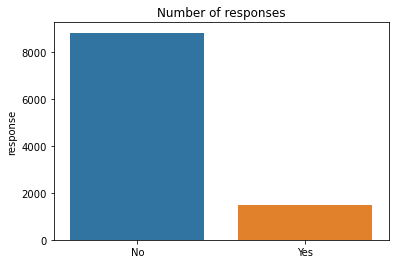

In [245]:
# create figure and axes
# subplots()
fig1, ax1 = plt.subplots()
# set title
# set_title()
ax1.set_title("Number of responses")
# plot the bar chart
# bar()


sns.barplot(x=response.index ,y =response)

In [332]:
df3.head(3)

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,dk49336,arizona,4809.216960,no,basic,college,2/18/11,employed,m,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,1,kx64629,california,2228.525238,no,basic,college,1/18/11,unemployed,f,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,2,lz68649,washington,14947.917300,no,basic,bachelor,2/10/11,employed,m,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,a


## 4. Show a plot of the response rate by the sales channel.<a class="anchor" id="17"></a>

In [20]:
#size includes NaN values, count does not:
response_channel = df3.groupby(['sales channel','response']).size().reset_index(name='# of responses')
response_channel




,sales channel,response,# of responses
0,agent,no,3148
1,agent,yes,742
2,branch,no,2539
3,branch,yes,326
4,call center,no,1792
5,call center,yes,221
6,web,no,1334
7,web,yes,177


In [362]:
#sales_channel_count= df3['sales channel'].value_counts()
#sales_channel_count

<AxesSubplot:title={'center':'Response by channel'}, xlabel='response', ylabel='total'>

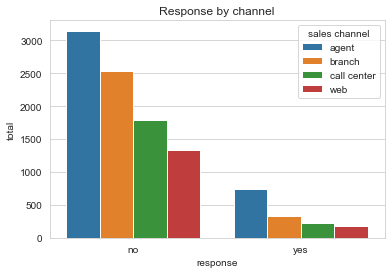

In [361]:
# Start with the usual matplotlib subplots() function
fig2, ax2 = plt.subplots()

# set the title using: set_title()
ax2.set_title("Response by channel")

# uses seaborn barplot
sns.barplot(x = response_channel['response'], y = response_channel['total'],hue = response_channel['sales channel'])


## 5. Show a plot of the response rate by the total claim amount.<a class="anchor" id="18"></a>

In [74]:
response_claim_amount = df3.groupby(['response','total claim amount']).size().reset_index(name='# of respones')
response_claim_amount

,response,total claim amount,# of respones
0,no,0.099007,1
1,no,0.382107,2
2,no,0.423310,2
3,no,0.517753,1
4,no,0.769185,1
...,...,...,...
5161,yes,1261.319869,6
5162,yes,1294.700423,6
5163,yes,1300.800000,6
5164,yes,1324.800000,7


In [78]:
#analysing the amount of yes / no /nan and putting them into seperate lists
response_claim_amount_yes =[]
response_claim_amount_no =[]
response_claim_amount_nan =[]
for i in df3.response:
    if i == 'yes':
        response_claim_amount_yes.append(i)
    elif i == 'no':
        response_claim_amount_no.append(i)
    else:
        response_claim_amount_nan.append(i) 

In [79]:
# converting to a series
# not yet working for the analysis as adding it to df3 would put all cells in that column as Nan
response_claim_amount_nan = pd.Series(response_claim_amount_nan)
response_claim_amount_nan


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
626   NaN
627   NaN
628   NaN
629   NaN
630   NaN
Length: 631, dtype: float64

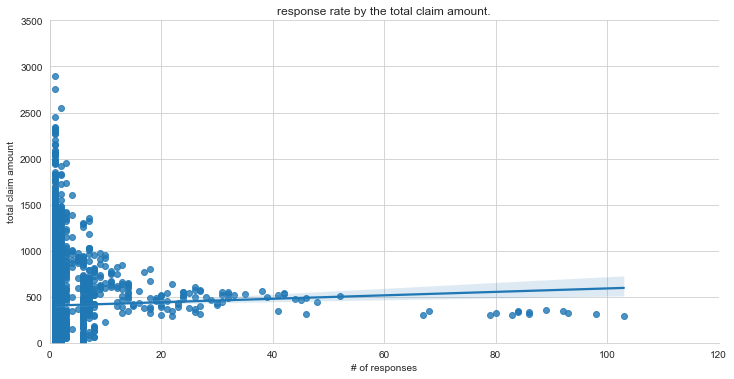

In [419]:
#not yet final as it doesn't differiate between no, yes and nan responses
sns.set_style("whitegrid")
g = sns.lmplot(x='# of respones', y="total claim amount",data=response_claim_amount, aspect=2)
g = (g.set_axis_labels("# of responses","total claim amount").set(xlim=(0,120),ylim=(0,3500)))
plt.title("response rate by the total claim amount.")
plt.show(g)

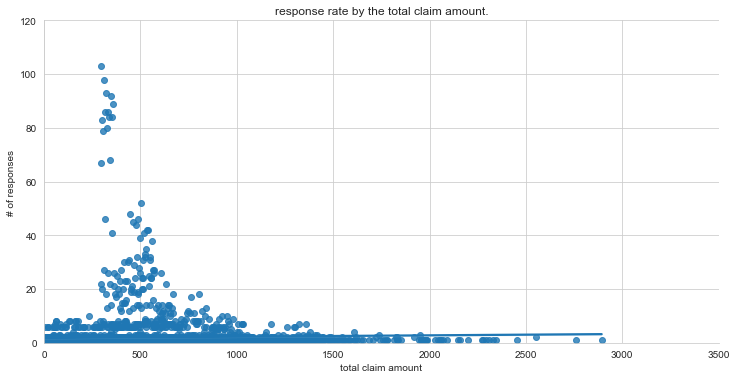

In [398]:
#switching x and y axis
sns.set_style("whitegrid")
g = sns.lmplot(x="total claim amount", y='# of respones',data=response_claim_amount, aspect=2)
g = (g.set_axis_labels("total claim amount","# of responses").set(xlim=(0,3500),ylim=(0,120)))
plt.title("response rate by the total claim amount.")
plt.show(g)

## 6. Show a plot of the response rate by income.<a class="anchor" id="19"></a>

In [399]:
response_income = df3.groupby(['response','income']).size().reset_index(name='# of respones')
response_income

,response,income,# of respones
0,no,0,2392
1,no,10037,1
2,no,10074,1
3,no,10097,2
4,no,10105,1
...,...,...,...
5699,yes,95697,14
5700,yes,96306,6
5701,yes,97131,7
5702,yes,97361,6


5. Don't Limit your creativity!  plot Any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed. <a class="anchor" id="20"></a>

## 8. Plot the Correlation Heatmap. <a class="anchor" id="21"></a>

## 9. Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.<a class="anchor" id="22"></a>

# Importing SQL- cleaned data into pandas

In [88]:
import pandas as pd
import getpass
import sqlalchemy as sa

driver = 'mysql+pymysql'
user = 'root'
password = getpass.getpass(prompt='Your password:'"")
ip = '127.0.0.1'

connection_string = f'{driver}://{user}:{password}@{ip}'
    
db_connection = sa.create_engine(connection_string)

insp = sa.inspect(db_connection)
db_list = insp.get_schema_names()
print(db_list)
['bank', 'cs_study', 'information_schema', 'lab_db', 'lab_db_python_sql', 'lab_groupby', 'mysql', 'olist', 'performance_schema', 'sakila', 'sys']

query = "SELECT * FROM cs_study.cs_study2"
cs_study = pd.read_sql_query(query, db_connection)
cs_study.head()

Your password:········
['bank', 'cs_study', 'information_schema', 'lab_db', 'lab_db_python_sql', 'lab_groupby', 'mysql', 'olist', 'performance_schema', 'sakila', 'sys']


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,,2108,,Basic,Bachelor,1/2/11,Unemployed,M,0,Suburban,...,0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,nan
1,,2143,,Basic,Bachelor,1/23/11,Unemployed,M,0,Suburban,...,0,1,Corporate Auto,Corporate L1,Offer4,Web,686.774939,Two-Door Car,Medsize,nan
2,,2150,,Basic,High School or Below,2/9/11,Unemployed,F,0,Suburban,...,0,1,Personal Auto,Personal L3,Offer2,Web,292.800000,Four-Door Car,Medsize,nan
3,,2225,,Basic,College,1/22/11,Unemployed,M,0,Suburban,...,0,1,Personal Auto,Personal L3,Offer2,Web,326.400000,Four-Door Car,Medsize,nan
4,,2227,,Basic,High School or Below,1/5/11,Retired,M,27972,Suburban,...,0,1,Personal Auto,Personal L3,Offer3,Web,292.800000,Four-Door Car,Medsize,nan


### Statistic Tasks

1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [89]:
numerical= cs_study.select_dtypes(include=np.number)
numerical.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount
0,2108,0,61,91,1,351.856810
1,2143,0,65,71,1,686.774939


In [90]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        10776 non-null  int64  
 1   income                         10776 non-null  int64  
 2   monthly_premium_auto           10776 non-null  int64  
 3   months_since_policy_inception  10776 non-null  int64  
 4   number_of_policies             10776 non-null  int64  
 5   total_claim_amount             10776 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 505.2 KB


In [147]:
categorical = cs_study.select_dtypes(include=object)
categorical.head(2)

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,months_since_last_claim,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,,,Basic,Bachelor,1/2/11,Unemployed,M,Suburban,Single,8.0,0,Personal Auto,Personal L2,Offer1,Agent,Two-Door Car,Medsize,nan
1,,,Basic,Bachelor,1/23/11,Unemployed,M,Suburban,Single,3.0,0,Corporate Auto,Corporate L1,Offer4,Web,Two-Door Car,Medsize,nan


## One hot encoder

In [148]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [160]:
#np.reshape(categorical.policy_type)

In [167]:
#encoding the data
enc = OneHotEncoder(handle_unknown='ignore')
X = [categorical.policy_type, categorical.policy]
enc.fit(X)
X
enc.fit_transform(np.array(categorical.loc[:,["policy_type", "marital_status"]])).toarray()
                  
                  

array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.]])

In [168]:
OneHotEncoder(handle_unknown='ignore')
enc.categories_

[array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object)]

In [173]:
pd.get_dummies(categorical.policy_type)

,Corporate Auto,Personal Auto,Special Auto
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
10771,0,1,0
10772,0,1,0
10773,0,1,0
10774,0,1,0


2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 

In [92]:
##libraries needed:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score
from numpy import random

In [93]:
##Use seaborn library to construct distribution plots for the numerical variables##

/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

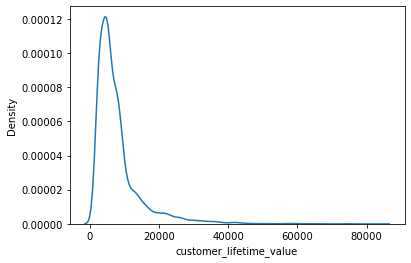

In [94]:
#customer_lifetime_value
sns.distplot(numerical.customer_lifetime_value,hist=False)

/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


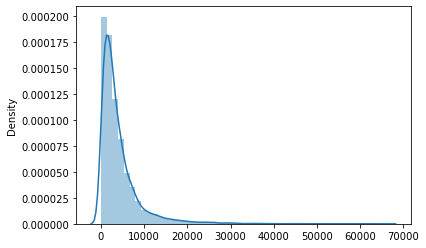

In [95]:
sns.distplot(random.uniform(numerical.customer_lifetime_value), hist=True)

plt.show()

## use log or square root transformation

In [119]:
#square root
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
series = numerical
dataframe = numerical.values
#dataframe.columns = ['customer_lifetime_value']
dataframe['customer_lifetime_value'] = sqrt(dataframe['customer_lifetime_value'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['customer_lifetime_value'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['customer_lifetime_value'])
pyplot.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132


/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


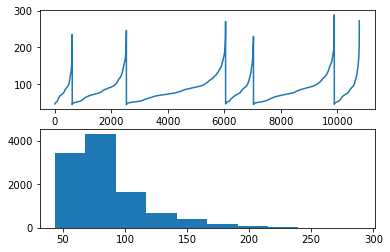

In [96]:
from matplotlib import pyplot
from numpy import sqrt

transform = numerical.customer_lifetime_value = sqrt(numerical.customer_lifetime_value)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

Mean=8016.717, Standard Deviation=6884.734


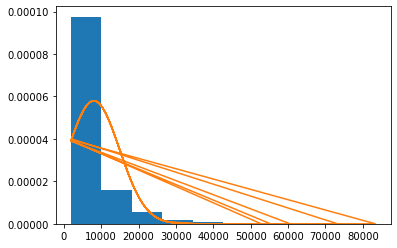

In [73]:
## customer_lifetime_value
# calculate parameters
numerical_mean = np.mean(numerical.customer_lifetime_value)
numerical_std = np.std(numerical.customer_lifetime_value)
print('Mean=%.3f, Standard Deviation=%.3f' % (numerical_mean, numerical_std))

#define the distribution
dist = sc.stats.norm(numerical_mean, numerical_std)

# sample probabilities for a range of outcomes
values = [value for value in (numerical.customer_lifetime_value)]
probabilities = [dist.pdf(value) for value in values]

# plot the histogram and pdf
plt.hist(numerical.customer_lifetime_value, bins=10, density=True)
plt.plot(values, probabilities)

3. Normalize (numericals)

In [78]:

from sklearn import preprocessing

x = numerical.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
numerical_normalized = pd.DataFrame(x_scaled)
numerical_normalized.head(10)

,0,1,2,3,4,5,6
0,0.005683,0.009576,0.000000,0.000000,0.919192,0.0,0.121583
1,0.909891,0.011124,0.000000,0.016878,0.717172,0.0,0.237346
2,0.364836,0.011433,0.000000,0.000000,0.313131,0.0,0.101171
3,0.111376,0.014704,0.000000,0.029536,0.040404,0.0,0.112784
4,0.886424,0.014790,0.279773,0.000000,0.383838,0.0,0.101171
5,0.853515,0.014877,0.000000,0.000000,0.575758,0.0,0.101171
6,0.245394,0.015179,0.000000,0.012658,0.565657,0.0,0.106148
7,0.887982,0.015696,0.249147,0.008439,0.636364,0.0,0.120201
8,0.435787,0.016640,0.000000,0.029536,0.434343,0.0,0.187311
9,0.242185,0.017410,0.690371,0.000000,0.323232,0.0,0.082413


4. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

In [80]:
#Multicollinearity can be detected using various techniques, one is the Variance Inflation Factor(VIF)
#Generally, a VIF above 5 indicates a high multicollinearity. 
#Reference: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
vif_data = pd.DataFrame()
vif_data["feature"] = numerical.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical.values, i)
                          for i in range(len(numerical.columns))]
  
print(vif_data)

                         feature        VIF
0                    customer_id   3.344486
1        customer_lifetime_value   2.824088
2                         income   2.869732
3           monthly_premium_auto  14.147253
4  months_since_policy_inception   3.337473
5             number_of_policies   2.294712
6             total_claim_amount   6.646222


5. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

6. Bonus: split Data set into train and test sets